# Additional Plotting For Analyzer Trade Studies

After running a trade study in Analyzer, click File -> Export Data -> Ok to save the data as a csv to be used in this script.

## Read data from a csv exported from Analyzer

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
sns.set(context='talk',style='white')
sns.set(context='notebook',style='white')
import matplotlib.pyplot as plt
%matplotlib notebook
# %matplotlib inline
import warnings
warnings.simplefilter('ignore')

In [2]:
# List of file names from Analyzer
# fileNames = ['data1.csv','data2.csv','data3.csv'] # Can use multiple files. If so, you may need to add in missing values
fileNames = ['data1.csv'] # rename as needed. Ex: data1.csv, data2.csv, data3.csv


# Extract the data from each file and append
data = pd.DataFrame()
for file in fileNames:
    datai = pd.read_csv(file,header=0)
    # Reformat the data
    datai = datai.set_index('<Run Result>')
    datai = datai.T
    datai = datai.reset_index()
    datai = datai.drop('index',axis=1)

    # Replace Column Names
    cols = datai.columns
    colsNew = []
    for col in cols:
        parts = col.split('.')
        colsNew.append(parts[-1])
    colsNew = pd.Series(colsNew).str.replace(')','')
    datai.columns = colsNew.values
    data = data.append(datai)

# Reset indices    
data = data.reset_index(drop=True)

# Replace missing values with the default values used by Analyzer or that were in STK.
# Do this if data is missing from appending different trade studies

# data['SemiMajorAxis'] = data['SemiMajorAxis'].fillna(6678.137)
# data['ArgOfPerigee'] = data['ArgOfPerigee'].fillna(0)
# data['Eccentricity'] = data['Eccentricity'].fillna(0)
# data['Azimuth'] = data['Azimuth'].fillna(0)
# data['Elevation'] = data['Elevation'].fillna(90)
# data['coneAngle'] = data['coneAngle'].fillna(45)

data

,SemiMajorAxis,Inclination,Eccentricity,ArgOfPerigee,Total
0,7000.0,60.0,0.04,315.0,2509.475605
1,6950.0,60.0,0.04,315.0,2012.736895
2,6900.0,60.0,0.04,315.0,1401.207037
3,6850.0,60.0,0.04,315.0,1734.571866
4,6800.0,60.0,0.04,315.0,1487.878953
...,...,...,...,...,...
1395,7000.0,30.0,0.00,0.0,236.417706
1396,6950.0,30.0,0.00,0.0,0.000000
1397,6900.0,30.0,0.00,0.0,0.000000
1398,6850.0,30.0,0.00,0.0,0.000000


## Investigate the data

In [3]:
# Summary of data
dataSum = data.describe()
dataSum

,SemiMajorAxis,Inclination,Eccentricity,ArgOfPerigee,Total
count,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000
mean,6900.000000,45.000000,0.020000,157.500000,1783.003996
std,70.735945,10.003573,0.014147,103.144797,1336.147429
min,6800.000000,30.000000,0.000000,0.000000,0.000000
25%,6850.000000,35.000000,0.010000,78.750000,864.686893
50%,6900.000000,45.000000,0.020000,157.500000,1538.378448
75%,6950.000000,55.000000,0.030000,236.250000,2418.857858
max,7000.000000,60.000000,0.040000,315.000000,7798.447791


In [4]:
# Currently the tradestudy is assumed to only have one result.
# If your trade study has multiple results, drop the columns of remaining results
# data = data.drop(['res2Name2','res3Name'],axis=1)

# Show the rows of the top values
res = data.columns[-1]       
# res = 'Total' # Can manually choose the result
data = data.sort_values(res,ascending=False)
data.head(10)

,SemiMajorAxis,Inclination,Eccentricity,ArgOfPerigee,Total
370,7000.0,40.0,0.04,225.0,7798.447791
195,7000.0,40.0,0.04,270.0,7774.229663
371,6950.0,40.0,0.04,225.0,7150.263240
196,6950.0,40.0,0.04,270.0,6964.121748
405,7000.0,40.0,0.03,225.0,6946.434427
230,7000.0,40.0,0.03,270.0,6767.482561
372,6900.0,40.0,0.04,225.0,6597.175800
406,6950.0,40.0,0.03,225.0,6339.065065
375,7000.0,35.0,0.04,225.0,6271.243874
231,6950.0,40.0,0.03,270.0,6163.820865


In [5]:
# How the data is lineraly correlated to the result, note this doesn't capture higher order correlations
corrMat = data.corr()
correlations = corrMat[res].sort_values(ascending=False)
correlations

Total            1.000000
SemiMajorAxis    0.348239
ArgOfPerigee     0.327968
Eccentricity     0.083089
Inclination     -0.069521
Name: Total, dtype: float64

In [6]:
# Look at magnitude of the correlation
correlationsAbs = correlations.abs().sort_values(ascending=False)
correlationsAbs

Total            1.000000
SemiMajorAxis    0.348239
ArgOfPerigee     0.327968
Eccentricity     0.083089
Inclination      0.069521
Name: Total, dtype: float64

In [7]:
# Pick two variables for plotting
var1 = correlationsAbs.index[1]
var2 = correlationsAbs.index[2]
# var1 = 'Elevation' # Can manually choose the variable
# var2 = 'Azimuth' # Can manually choose the variable

## Quick and Simple plots using Pandas

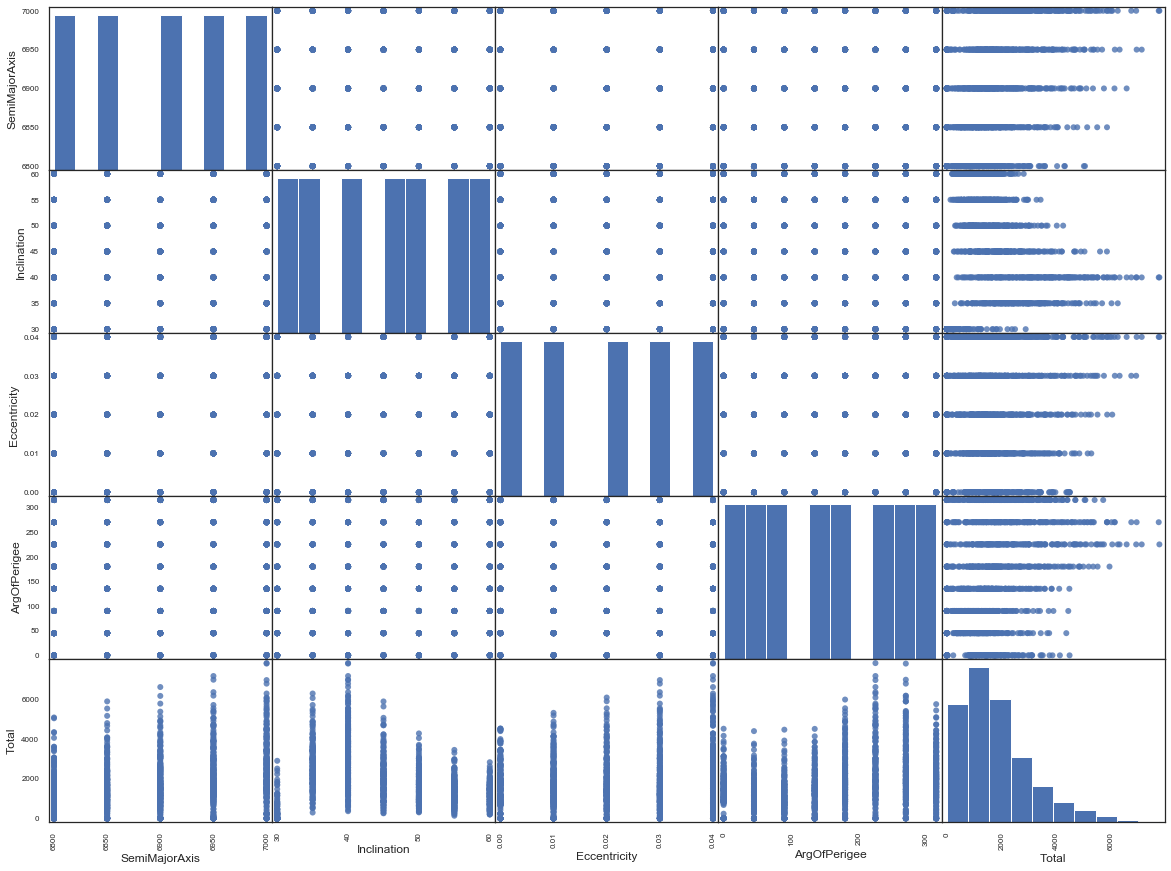

In [8]:
# Quick scatterplot of the data
pd.plotting.scatter_matrix(data,figsize=(20,15),marker='o',alpha=0.8);

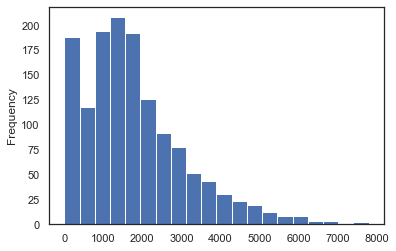

In [9]:
# Frequency of results
plt.figure()
data[res].plot.hist(bins=20);

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


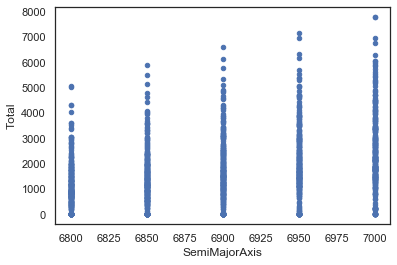

In [10]:
# Variable 1 vs result
data.plot.scatter(x = var1,y = res);

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


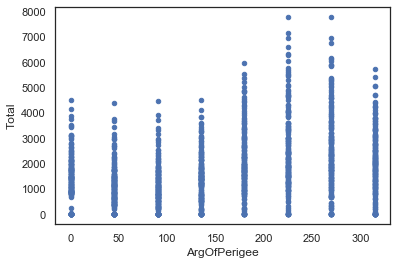

In [11]:
# Variable 2 vs result
data.plot.scatter(x = var2,y = res);

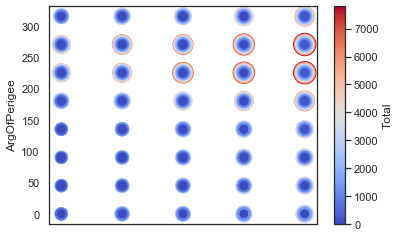

In [12]:
# Result as a color and size vs the 2 variables
scale = data[res]/(data[res].max()-data[res].min())*90+10 # Scale between 10 and 100
data.plot.scatter(var1, var2, c=res, s=scale*5, colormap='coolwarm');

## 3D plots using Matplotlib's mplot3d

<IPython.core.display.Javascript object>


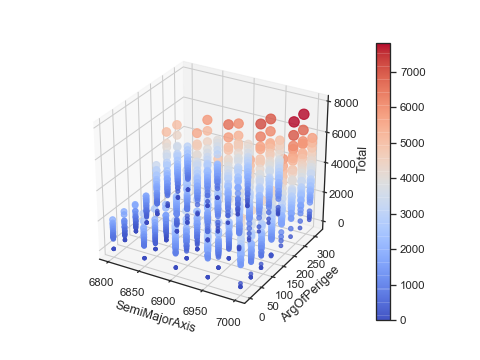

In [13]:
# PLot in 3D
%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
scPlt = ax.scatter(xs=data[var1],ys=data[var2],zs=data[res],marker='o',alpha=0.8,c=data[res],s=scale,cmap='coolwarm')
ax.set_xlabel(var1)
ax.set_ylabel(var2)
ax.set_zlabel(res)
plt.colorbar(scPlt,ax=ax);

In [14]:
# Get the max values and unique indices to be used for the surface plot
df = data.groupby([var1,var2])
dataMax = df[res].max()
xy = list(zip(*dataMax.index.values))
z = dataMax.values
x = xy[0]
y = xy[1]

# # Regular surface plots require evenly spaced grid points
# try:
#     X,Y = np.meshgrid(np.unique(x),np.unique(y))
#     Z = np.zeros(X.shape)
#     for ii in range(X.shape[0]):
#         for jj in range(X.shape[1]):
#             Z[ii,jj] = dataMax.loc[(X[ii,jj],Y[ii,jj])]

#     fig = plt.figure()
#     plt.contourf(X,Y,Z,levels=50,cmap='coolwarm')
#     plt.colorbar();
#     fig2 = plt.figure()
#     ax = fig2.add_subplot(111, projection='3d')
#     ax.plot_surface(X=X,Y=Y,Z=Z,cmap='coolwarm',edgecolor='none')
#     ax.set_xlabel(var1)
#     ax.set_ylabel(var2)
#     ax.set_zlabel(res);

# except:
#     print('Data is not in a grid format')

<IPython.core.display.Javascript object>


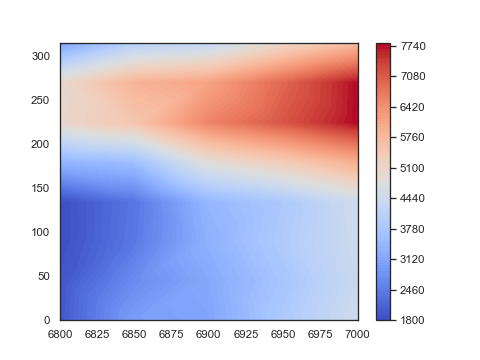

<IPython.core.display.Javascript object>


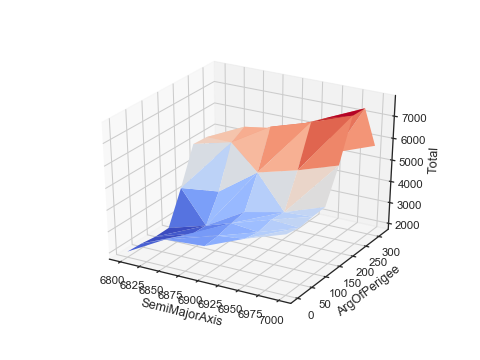

In [15]:
# Triagonal contour and surface plot using the max values of the result by each group of indices
fig = plt.figure()
plt.tricontourf(x, y, z,levels=100,cmap='coolwarm')
plt.colorbar();

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_trisurf(x, y, z,cmap='coolwarm', edgecolor='none')
ax.set_xlabel(var1)
ax.set_ylabel(var2)
ax.set_zlabel(res);

## More advanced plots using Seaborn

In [16]:
# Break the results into evenly spaced catergories with labels
numCats = 3
resCat = pd.cut(data[res],numCats,labels=['low','medium','high'])
dataCat = data.copy()
dataCat['Result Category'] = resCat

# Change the color palette
sns.set_palette('coolwarm',7)
current_palette = sns.color_palette()
current_palette = [current_palette[0],current_palette[3],current_palette[6]] # Pull out the first, middle and end color
sns.set_palette(current_palette)

# A different color palette. Find more here: https://seaborn.pydata.org/tutorial/color_palettes.html
# sns.set_palette('colorblind')
# current_palette = sns.color_palette()

colors = [c for c in current_palette[0:numCats]]

<IPython.core.display.Javascript object>


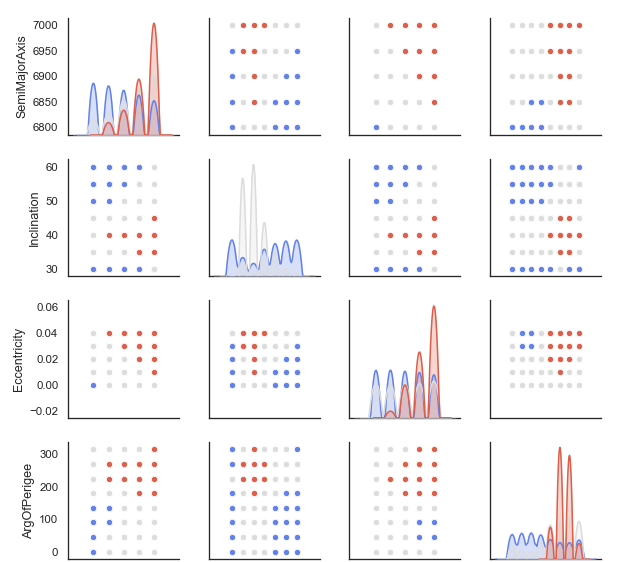

In [17]:
# Similar to the scatterplot from earlier but colored by categories and with kdes
sns.pairplot(dataCat, hue = 'Result Category',diag_kind='kde',diag_kws={'kernel':'epa'}, height=2);

<IPython.core.display.Javascript object>


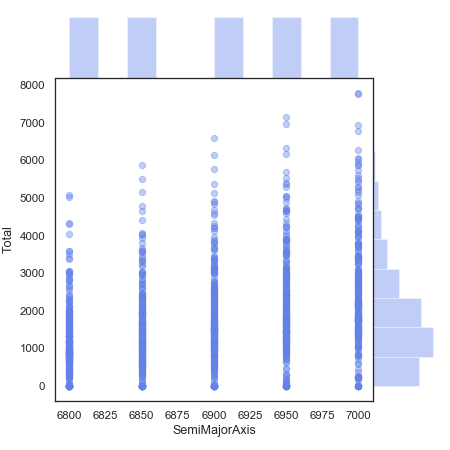

In [18]:
# Scatter plots with histograms in the margins
sns.jointplot(data[var1], data[res], alpha=0.4,space=0,marginal_kws={'bins':10});

<IPython.core.display.Javascript object>


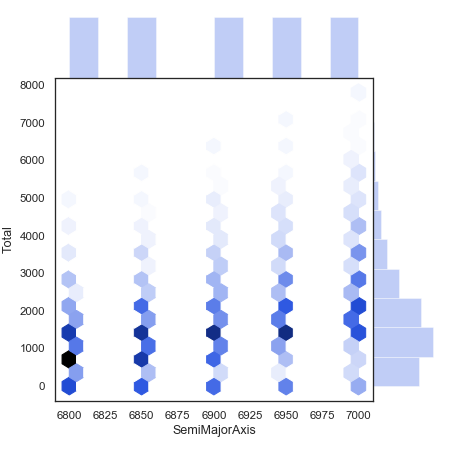

In [19]:
# Hex plot with histograms in the margins
sns.jointplot(data[var1], data[res], kind='hex', space=0,marginal_kws={'bins':10});

<IPython.core.display.Javascript object>


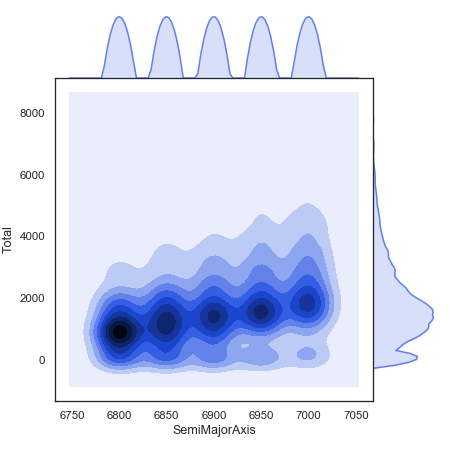

In [20]:
# KDE plot with kdes in the margins
sns.jointplot(data[var1], data[res], kind='kde',kernel='epa',marginal_kws={'kernel':'epa'}, space=0);

<IPython.core.display.Javascript object>


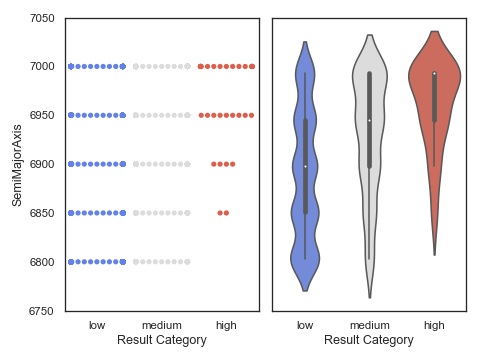

In [21]:
# Swarm and Violin plots, useful for understanding data distribution
plt.figure()
plt.subplot(121)
ax1 = sns.swarmplot('Result Category',var1, data=dataCat);
plt.subplot(122)
ax2 =sns.violinplot('Result Category',var1, data=dataCat);
ax1.yaxis.set_ticks(ax2.yaxis.get_ticklocs()[1:-1])
ax2.yaxis.set_label_text('')
ax2.yaxis.set_ticklabels('')
plt.tight_layout() # Fixes axes if they are getting cut off

<IPython.core.display.Javascript object>


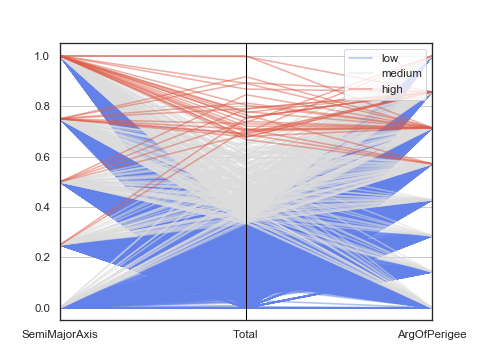

In [22]:
# Parallel coordinates with scaled data using min =  0 and max = 1
from sklearn.preprocessing import MinMaxScaler
data_scaled = MinMaxScaler().fit_transform(data.values)
data_scaled = pd.DataFrame(data_scaled,columns=data.columns)
# data_scaled = data_scaled.sort_values(res,ascending=False)
data_scaled['Result Category'] = resCat.reset_index(drop=True)
data_scaled = data_scaled[[var1,res,var2,'Result Category']]
fig = plt.figure()
pd.plotting.parallel_coordinates(data_scaled.sort_values(res), 'Result Category',color=colors, alpha=0.5);

<IPython.core.display.Javascript object>


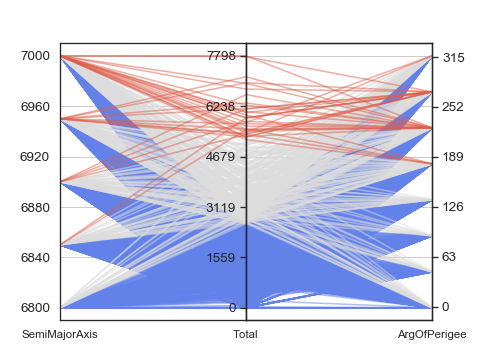

In [23]:
# Custom parallel coordinates plot with non-scaled y axes labels

# Reference: http://benalexkeen.com/parallel-coordinates-in-matplotlib/

from matplotlib import ticker

cols = [var1,res,var2]
xloc = [i for i, _ in enumerate(cols)]
resCol = pd.cut(data[res],numCats,labels=colors)

# Create (X-1) sublots along x axis
fig, axes = plt.subplots(1, len(xloc)-1, sharey=False)

df = data.sort_values(res).copy()
# Get min, max and range for each column
# Normalize the data for each column
min_max_range = {}
for col in cols:
    min_max_range[col] = [df[col].min(), df[col].max(), np.ptp(df[col])]
    df[col] = np.true_divide(df[col] - df[col].min(), np.ptp(df[col]))

# Plot each row
for i, ax in enumerate(axes):
    for idx in df.index:
        ax.plot(xloc, df.loc[idx, cols], color=resCol[idx],alpha=0.5)
    ax.set_xlim([xloc[i], xloc[i+1]])
    ax.grid()
    
# Set the tick positions and labels on y axis for each plot
# Tick positions based on normalized data
# Tick labels are based on original data
def set_ticks_for_axis(dim, ax, ticks,finalAxis=False,replaceFloatWithInt=False):
    min_val, max_val, val_range = min_max_range[cols[dim]]
    step = val_range / float(ticks-1)
    tick_labels = [round(min_val + step * i, 2) for i in range(ticks)]
    if replaceFloatWithInt ==True:
        tick_labels = np.asarray(tick_labels).astype(int)
    norm_min = df[cols[dim]].min()
    norm_range = np.ptp(df[cols[dim]])
    norm_step = norm_range / float(ticks-1)
    ticks = [round(norm_min + norm_step * i, 2) for i in range(ticks)]
    if finalAxis == True:
        ticks = np.asarray(ticks)*0.9+0.05
    ax.yaxis.set_ticks(ticks)
    ax.set_yticklabels(tick_labels)
    ax.yaxis.set_tick_params(labelsize=13)

    
for dim, ax in enumerate(axes):
    ax.xaxis.set_major_locator(ticker.FixedLocator([dim]))
    set_ticks_for_axis(dim, ax, ticks=6,replaceFloatWithInt=True)
    ax.set_xticklabels([cols[dim]])
    

# Move the final axis' ticks to the right-hand side
ax = plt.twinx(axes[-1])
dim = len(axes)
ax.xaxis.set_major_locator(ticker.FixedLocator([xloc[-2], xloc[-1]]))
set_ticks_for_axis(dim, ax, ticks=6,finalAxis=True,replaceFloatWithInt=True)
ax.set_xticklabels([cols[-2], cols[-1]])

# Remove space between subplots
plt.subplots_adjust(wspace=0.0)
